In [43]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [81]:
!pip install plotnine

In [44]:
# load and read data file
df = pd.read_csv("/Users/ajaeroihuoma/Desktop/QA/PYTHON/Unicorn_Companies.csv") # for csv file
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


### Data Inspection

In [45]:
# view shape
df.shape

(1074, 10)

In [46]:
# view columns
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [47]:
# view info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [48]:
num_unique_countries = df['Country'].nunique()
num_unique_cities = df['City'].nunique()
num_unique_industries = df['Industry'].nunique()

print('Total number of companies: ', df.shape[0])
print('Total number of unique industries: ', num_unique_industries)
print('Total number of unique countries: ', num_unique_countries)
print('Total number of unique cities: ', num_unique_cities)

Total number of companies:  1074
Total number of unique industries:  16
Total number of unique countries:  46
Total number of unique cities:  256


### Data Cleaning and Manipulation

In [49]:
# check for missing values
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [50]:
# check the 'City' column with NaN
df[df.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [51]:
# replace the NaN values 
'''I did some research and found the cities'''
# create a dictionary mapping countries to the right cities
country_city_mapping = {'Singapore': 'Singapore',
                        'Hong Kong': 'Hong Kong',
                        'Bahamas' : 'Nassau'
}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    Country = row['Country']
    City = row['City']
    
    # Check if the city value is null
    if pd.isnull(City):
        # If null, fill it with the appropriate city based on the country
        df.at[index, 'City'] = country_city_mapping.get(Country, '')
        
df[df.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


All null values in the City column have been filled with appropriate cities for the country

In [52]:
# Check the 'Select Investors' column with NaN
df[df['Select Investors'].isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [53]:
# dropping nulls
# drop rows with null values

data = df.dropna()
data.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

There are no null values 

In [54]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates

Next, I will convert the Valuation column from string to Integer, and remove the $ and B suffix

In [55]:
# Remove the dollar sign and 'B' suffix from the 'Valuation' column
df['Valuation'] = df['Valuation'].str.replace('$', '').str.replace('B', '')

# Convert the 'Valuation' column to numeric data type
df['Valuation'] = pd.to_numeric(df['Valuation'])

/var/folders/mz/c23vgs3s4ng3_vlv413k192h0000gn/T/ipykernel_18394/4063241000.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = df['Valuation'].str.replace('$', '').str.replace('B', '')


In [56]:
# Rename the 'Valuation' column
df = df.rename(columns={'Valuation': 'Valuation ($B)'})
'''I have renamed the valuation column in order for stakeholders to know it is in Dollars and Billions'''

'I have renamed the valuation column in order for stakeholders to know it is in Dollars and Billions'

In [57]:
# viewing unique industries
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

The Artificial Intelligence industry is shown twice, so I will be merging them into one 

In [58]:
df['Industry']=df['Industry'].replace('Artificial intelligence', 'Artificial Intelligence')
df[df.Industry == 'Artificial intelligence']

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


The Funding column has some rows with 'unknown' values. I will be replacing them with 0

In [59]:
df['Funding']=df['Funding'].replace('Unknown', '0')
df[df.Funding == 'Unknown']

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


## EDA
- What are the top 15 companies by valuation

- What year did most companies become unicorns

- Do older companies have any advantage with age

- How long does it usually take a company to become a unicorn?

- What industries have the most unicorns 

- What countries have the most unicorns (Top 5) 

- In these top 5 countries, what industries are most available

- Top 5 cities with the most unicorns 

- What investors have funded the most Unicorns

- Does the amount of funding influence the valuation


### What are the top 15 companies according to Valuation?

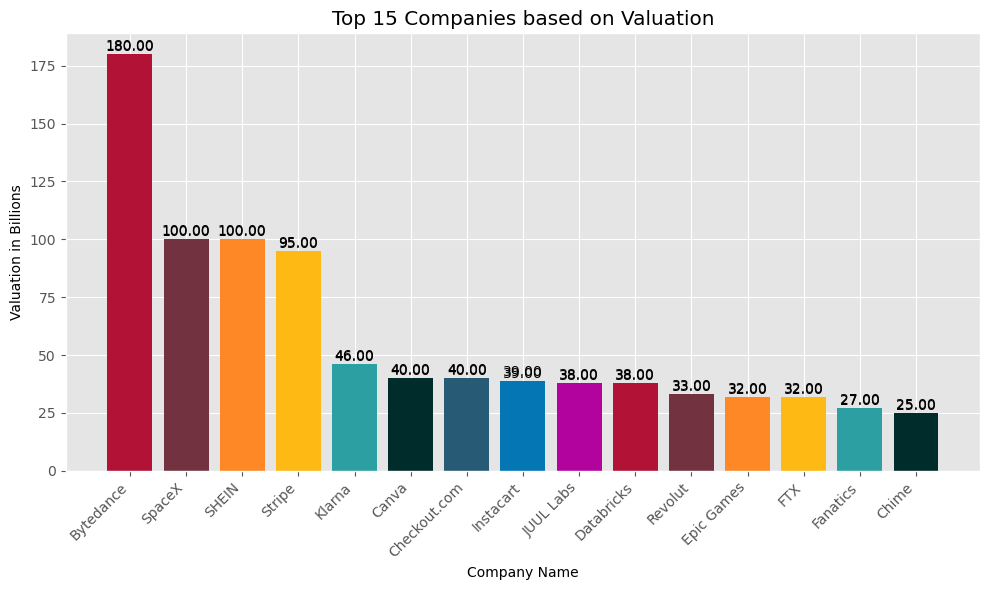

In [82]:
top_15_companies = df[['Company', 'Industry', 'Valuation ($B)']].sort_values(by='Valuation ($B)', ascending=False).head(15)

plt.figure(figsize=(10, 6))

colors = ["#B21236", "#723240", "#FE8826", "#FEB914", "#2C9FA2", "#002C2B", "#275A75", "#0376B3", "#B3039E"]
bars = plt.bar(top_15_companies['Company'], top_15_companies['Valuation ($B)'], color=colors)

# Add values inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Add values outside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Company Name')
plt.ylabel('Valuation in Billions')
plt.title('Top 15 Companies based on Valuation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Observation:
Bytedance is the most valuable unicorn, worth 180 Billion Dollars, followed by Shein and Spacex, worth 100 Billion Dollars each. 

### What year did most companies become unicorns?

In [62]:
# first convert the Date joined column to date time
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# split the column into year, month and day
df['Joined Year'] = df['Date Joined'].dt.year
df['Joined Month'] = df['Date Joined'].dt.strftime('%B')
df['Joined Day']=df['Date Joined'].dt.day

df.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Joined Year,Joined Month,Joined Day
0,Bytedance,180,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,7
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,3
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,23
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,12


In [63]:
# year most companies joined
year_unicorn = df.groupby('Joined Year')['Company'].count().sort_values(ascending = False)
print(year_unicorn)

Joined Year
2021    520
2022    116
2020    108
2019    104
2018    103
2017     44
2015     35
2016     21
2014     13
2012      4
2013      3
2011      2
2007      1
Name: Company, dtype: int64


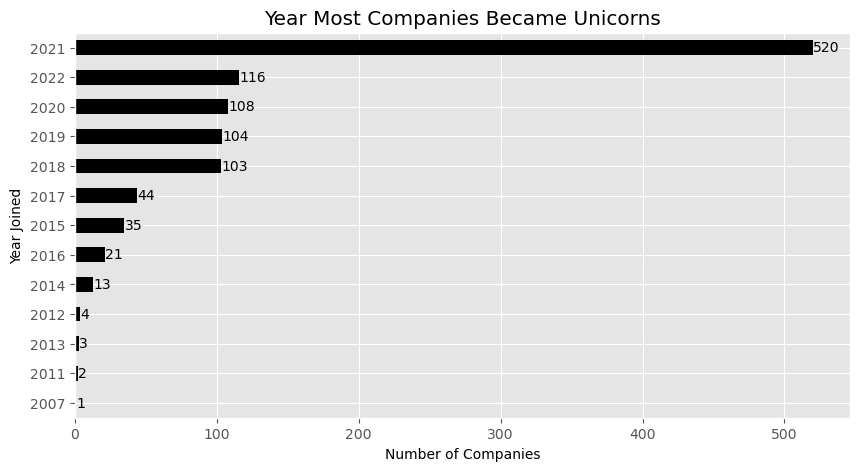

In [64]:
# visualize year most companies joined
yc = year_unicorn.sort_values(ascending=True).plot(kind='barh', color = 'black', figsize=(10, 5))
yc.set_title('Year Most Companies Became Unicorns')
yc.set_xlabel('Number of Companies')
yc.set_ylabel('Year Joined')

# Display the values on the bars
for i, v in enumerate(year_unicorn.sort_values(ascending=True)):
    yc.text(v, i, str(v), color='black', va='center')
plt.show()

#### Observation:
Most companies became unicorns in the year 2021, with a total of 520 companies. Followed by 2022 with a total of 116 companies.


### Do older companies have any advantage with age?

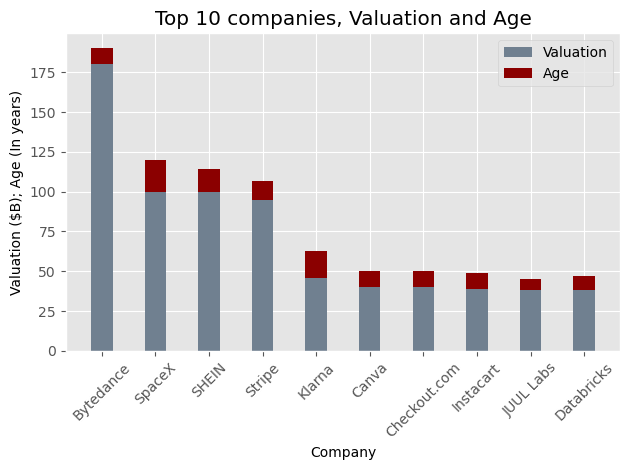

In [65]:
'''
we will be checking to see if the top companies in valuation is as a result of them being founded earlier
'''
# Calculate age
df['Age'] = 2022 - df['Year Founded']

top10_companies = df.nlargest(10, 'Valuation ($B)')

x = top10_companies['Company']
valuation = top10_companies['Valuation ($B)']
age = top10_companies['Age']

plt.bar(x, valuation, 0.4, label = 'Valuation', color = 'slategrey')
plt.bar(x, age, 0.4,bottom=valuation, label = 'Age', color = 'darkred')

plt.xlabel('Company')
plt.ylabel('Valuation ($B); Age (In years)')
plt.title('Top 10 companies, Valuation and Age')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


Let's check for Bottom 10 companies

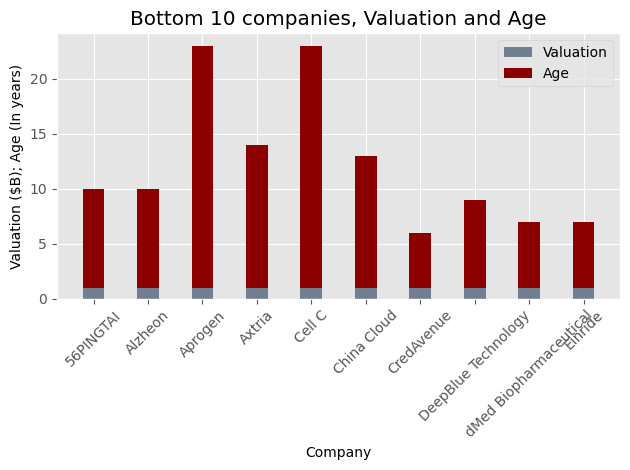

In [66]:
bot10_companies = df.nsmallest(10, 'Valuation ($B)')

x = bot10_companies['Company']
valuation = bot10_companies['Valuation ($B)']
age = bot10_companies['Age']

plt.bar(x, valuation, 0.4, label = 'Valuation', color = 'slategrey')
plt.bar(x, age, 0.4,bottom=valuation, label = 'Age', color = 'darkred')

plt.xlabel('Company')
plt.ylabel('Valuation ($B); Age (In years)')
plt.title('Bottom 10 companies, Valuation and Age')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

#### Observation:
* We can see that the companies founded earlier are the lowest in valuation. 

* However, more recently founded companies are higher in valuation. 

* Bytedance is valued the highest but was only recently founded. 

* Older companies have no advantage with age.

### How long does it usually take a company to become a unicorn?

In [67]:
'''we want to find out how many years on average a company takes to become a unicorn'''

# creating a separate column to find the difference between Joined year and Year founded. 
df['Year to unicorn'] = df['Joined Year'] - df['Year Founded']

# finding the average number of years
avg_years_to_unicorn = df['Year to unicorn'].mean().astype('int')
print('The average number of years it takes a company to become a unicorn is: ', avg_years_to_unicorn)

The average number of years it takes a company to become a unicorn is:  7


#### Has it always been this way? 

In [68]:
count_10 = ((df['Year to unicorn'] >= 0) & (df['Year to unicorn'] <= 10)).sum()
count_20 = ((df['Year to unicorn'] >= 11) & (df['Year to unicorn'] <= 20)).sum()
count_50 = ((df['Year to unicorn'] >= 21) & (df['Year to unicorn'] <= 50)).sum()
print('Number of companies between 0 to 10 years: ', count_10)
print('Number of companies between 10 to 20 years: ', count_20)
print('Number of companies between 21 to 50 years: ', count_50)

Number of companies between 0 to 10 years:  912
Number of companies between 10 to 20 years:  140
Number of companies between 21 to 50 years:  20


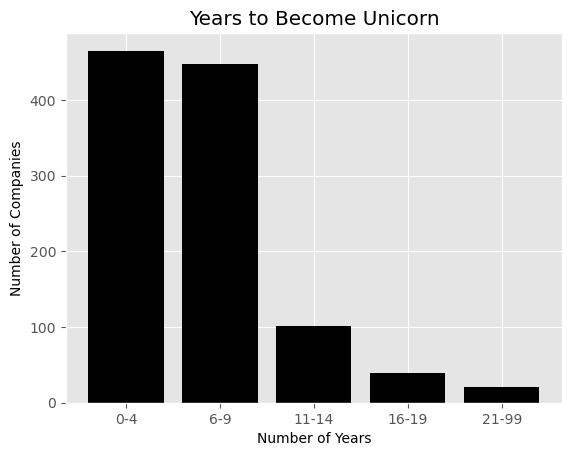

In [69]:
# Define the age ranges
age_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 100)]

# Group the DataFrame by age ranges and count the number of companies in each range
grouped = df.groupby(pd.cut(df['Year to unicorn'], bins=[r[0] for r in age_ranges] + [age_ranges[-1][1]+1], right=False)).size()

# Plot the bar chart
plt.bar(range(len(grouped)), grouped, color = 'black')
plt.xlabel('Number of Years')
plt.ylabel('Number of Companies')
plt.title('Years to Become Unicorn')

# Customize x-axis tick labels
plt.xticks(range(len(grouped)), ['{}-{}'.format(r[0], r[1]-1) for r in age_ranges])

# Display the chart
plt.show()

#### Observation:
* Most companies became unicorns within the first 10 years of founding. 

* Out of the total 1074 companies, 912 became unicorns within the first 10 years, 140 in the first 20 years.

### What industries have the most unicorns 

In [70]:
# industry vs company
top5_industries = df.groupby('Industry')['Company'].count().sort_values(ascending = False).head(5)
print

<function print>

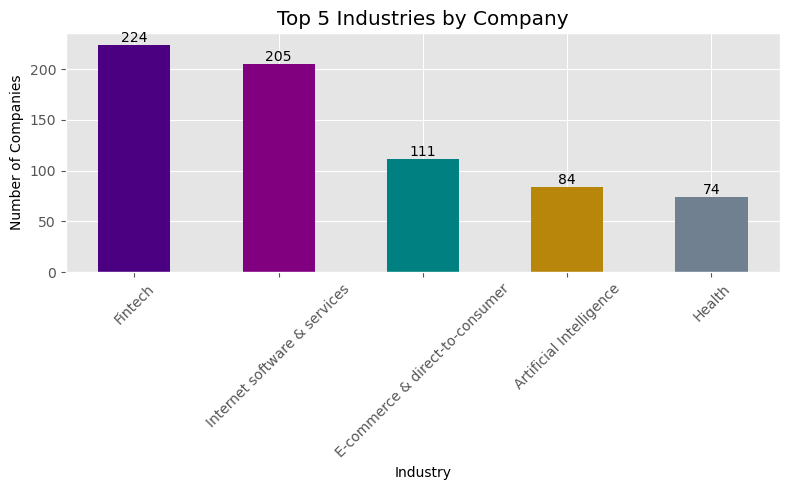

In [71]:
# visualize top 5 industries
x = top5_industries.index
y = top5_industries.values

style.use('ggplot')
plt.figure(figsize=(8,5))
color = ['indigo', 'purple', 'teal', 'darkgoldenrod', 'slategrey' ]
bars = plt.bar(x, y, color = color, width = 0.5)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Top 5 Industries by Company')
plt.xticks(rotation=45)
# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()

plt.show()

#### Observation:
The top 5 industries by number of company are Fintech, Internet software & services, E-Commerce & direct-to-consumer, Artificial Intelligence and Health

#### Are they also the most valuable?

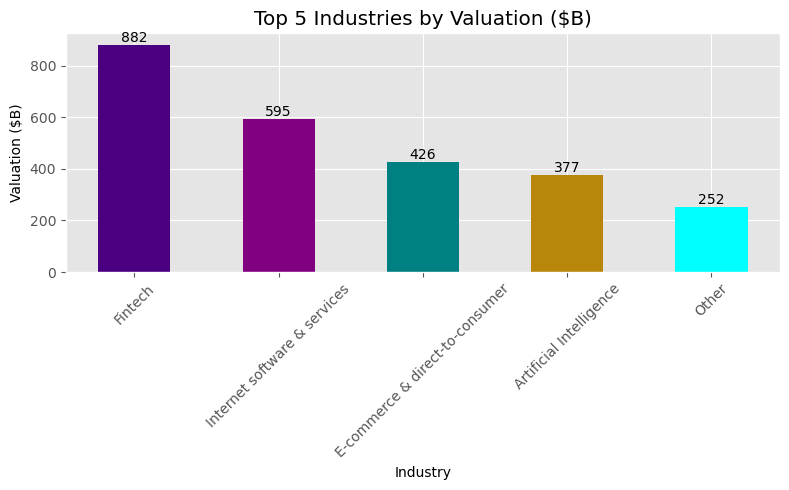

In [72]:
# industry vs valuation
top_industries = df.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending = False).head(5)

x = top_industries.index
y = top_industries.values

color = ['indigo', 'purple', 'teal', 'darkgoldenrod', 'aqua' ]
plt.figure(figsize=(8, 5))
bars = plt.bar(x, y, color=color, width=0.5)

plt.xlabel('Industry')
plt.ylabel('Valuation ($B)')
plt.title('Top 5 Industries by Valuation ($B)')
plt.xticks(rotation=45)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Observation:
All other top industries remained, except the Health industry which changed to Other

### What countries have the most unicorns ?

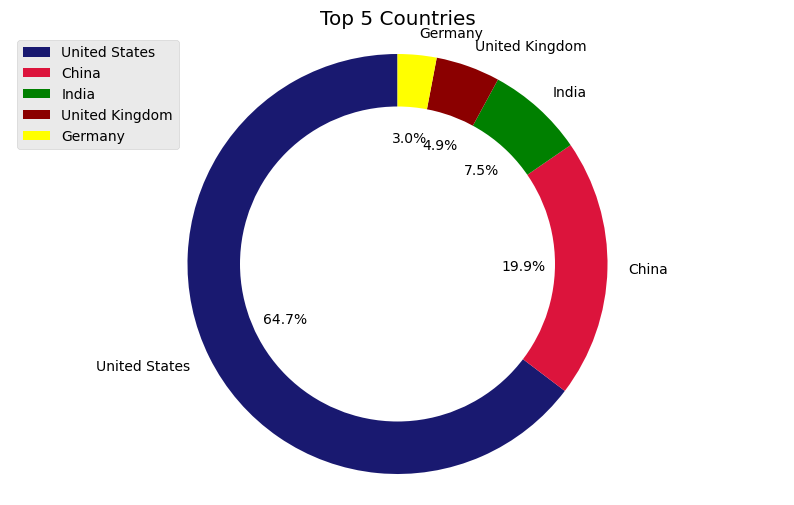

In [73]:
# top 5 countries by company
top_countries = df.groupby('Country')['Company'].count().sort_values(ascending=False).head(5)

# Prepare data for the pie chart
labels = top_countries.index
sizes = top_countries.values
colors = ['midnightblue', 'crimson', 'green', 'darkred', 'yellow' ]

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, startangle=90)

# Add title and legend
plt.title('Top 5 Countries')
plt.legend(loc='upper left')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# donut
circle = plt.Circle(xy= (0,0), radius = .75, facecolor = 'white')
plt.gca().add_artist(circle)

# Display the chart
plt.show()

#### Observation: 
* USA has the highest number of unicorns with 562 unicorns.

* China has second highest with 173 unicorns.

* India closely follows third with 65 unicorns.

* United Kingdom has fourth highest with 43 unicorns.

* Germany is the fifth highest with 26 unicorns.

### In these top 5 countries, what industries are most available

In [74]:
# create a new DataFrame containing the top countries.
selected_countries = ['United States', 'China', 'India', 'United Kingdom', 'Germany']

new_df = df[df['Country'].isin(selected_countries)].copy()

# Group by Country and Industry, count the companies, and select the top 5 industries in each country
top_industries = new_df.groupby(['Country', 'Industry'])['Company'].count().reset_index()
top_industries = top_industries.groupby('Country').apply(lambda x: x.nlargest(5, 'Company')).reset_index(drop=True)

# Display the top 5 industries in each country
print(top_industries)

           Country                             Industry  Company
0            China      E-commerce & direct-to-consumer       29
1            China              Artificial Intelligence       20
2            China                Auto & transportation       17
3            China                             Hardware       17
4            China         Internet software & services       14
5          Germany                              Fintech        5
6          Germany      E-commerce & direct-to-consumer        4
7          Germany         Internet software & services        4
8          Germany                               Travel        3
9          Germany                Auto & transportation        2
10           India      E-commerce & direct-to-consumer       16
11           India                              Fintech       15
12           India         Internet software & services       12
13           India  Supply chain, logistics, & delivery        7
14           India       

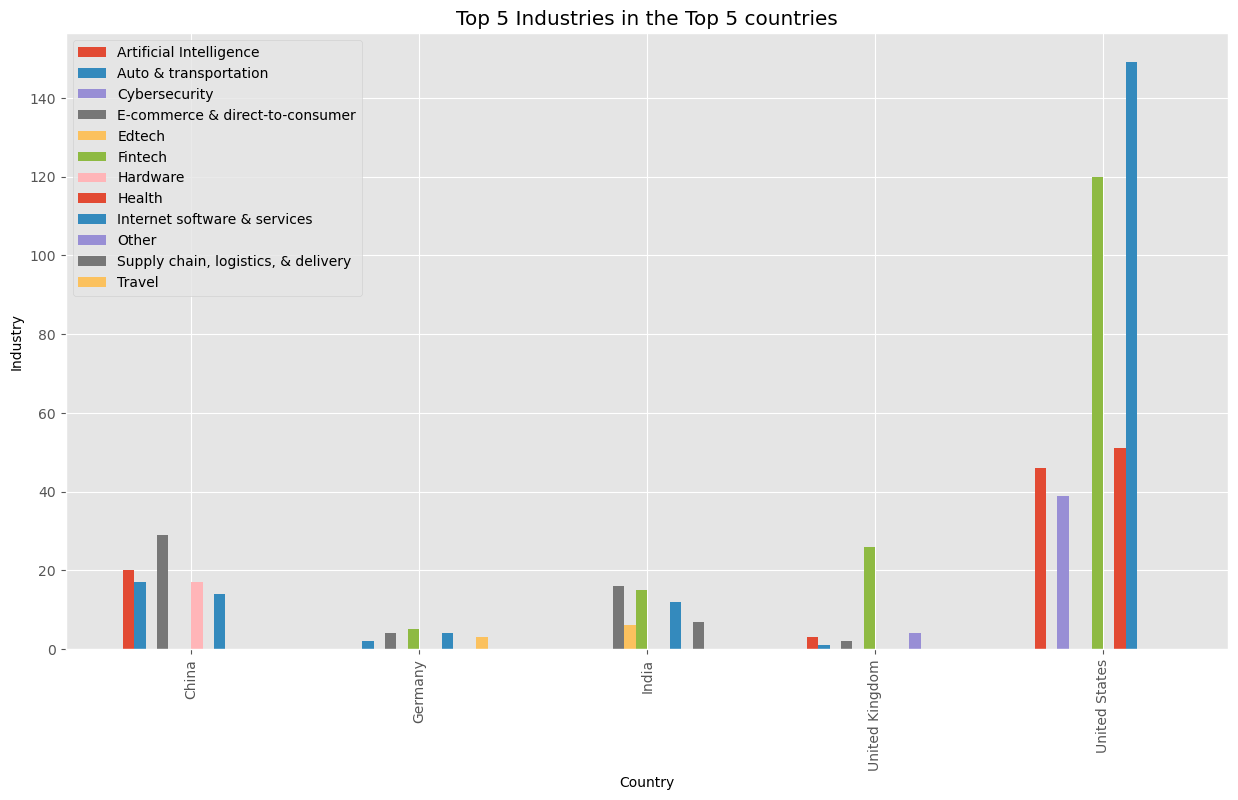

In [75]:
# visualize top 5 industries in the top 5 countries
top_industries.pivot(index = 'Country', columns = 'Industry', values = 'Company').plot(kind = 'bar', 
                                                                  figsize = (15, 8), width = 0.6)
plt.xlabel('Country')
plt.ylabel('Industry')
plt.title('Top 5 Industries in the Top 5 countries')
plt.legend(loc = 'upper left')
plt.show()

#### Observation:
* The top industry in the United States is Internet software & services with 149 companies.

* The top industry in the United Kingdom is Fintech with 26 companies.

* The top industry in China is E-commerce & direct-to-consumer with 29 companies.

* The top industry in India is E-commerce & direct-to-consumer with 16 companies.

* The top industry in Germany is Fintech with 5 companies. 

* Overall, Internet software and services, Artificial Intelligence and Fintech are seen to be most common. 


### What cities have the most unicorns?

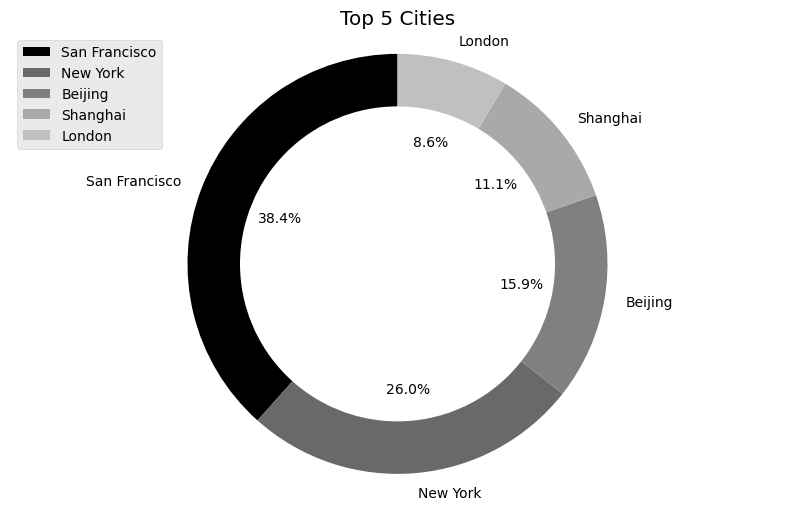

In [76]:
# top 5 cities by company
top_cities = df.groupby('City')['Company'].count().sort_values(ascending=False).head(5)

# Prepare data for the pie chart
labels = top_cities.index
sizes = top_cities.values
colors = ['black', 'dimgrey', 'grey', 'darkgrey', 'silver' ]

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, startangle=90)

# Add title and legend
plt.title('Top 5 Cities')
plt.legend(loc='upper left')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# donut
circle = plt.Circle(xy= (0,0), radius = .75, facecolor = 'white')
plt.gca().add_artist(circle)

# Display the chart
plt.show()

#### Observation:
* San Francisco has the highest number of companies with 152 unicorns.

* New York closely follows with 103 unicorns.

* Beijing follows third with 63 unicorns.

* Shanghai is the fourth with 44 unicorns.

* London comes fifth with 34 unicorns.

### What investors have funded the most unicorns?

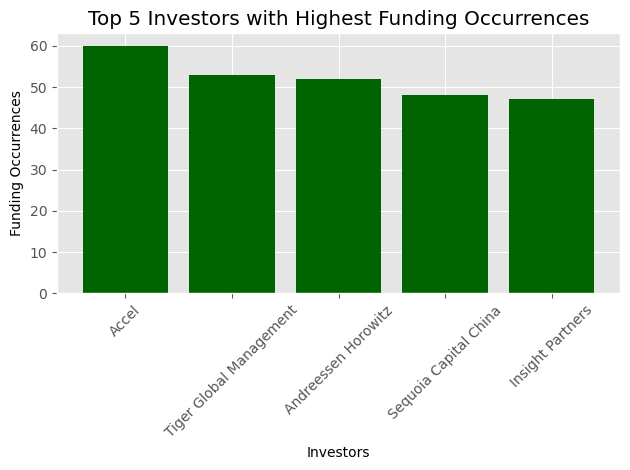

In [77]:
# Step 1: Split the 'Select Investors' column into different columns
investors_dummies = df['Select Investors'].str.get_dummies(', ')

# Step 2: Sum the occurrences of each individual investor across all rows
investor_counts = investors_dummies.sum()

# Step 3: Find the top 5 investors
top_investors = investor_counts.nlargest(5)

# Step 4: Plot a bar chart to visualize the top 5 investors
plt.bar(top_investors.index, top_investors.values, color = 'darkgreen')
plt.xlabel('Investors')
plt.ylabel('Funding Occurrences')
plt.title('Top 5 Investors with Highest Funding Occurrences')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:

The top 5 investors include: Accel, Tiger Global Management, Andreessen Horowitz, Sequoia Capital China, Insight Partners.

### Does the amount of funding influence the valuation?

In [78]:
# new column to separate billions, millions and thousands.
df['Funding unit'] = df['Funding'].str[-1]
df['Funding'] = df['Funding'].replace({"\$": "", "B": "", "M": "", 
                "None": np.nan, "K": ""}, regex=True)

# convert column to float
df['Funding'] = df['Funding'].astype(float)

# used a loop here to expand figures
for raised, row in df.iterrows():
    if row['Funding unit'] == "B":
        df.loc[raised, 'Funding'] = row['Funding'] * 1000000000
    elif row['Funding unit'] == "M":
        df.loc[raised, 'Funding'] = row['Funding'] * 1000000
    elif row['Funding unit'] == "K":
        df.loc[raised, 'Funding'] = row['Funding'] * 1000
    

# remove added column
# divide by 1 billion to match the valuation column
df = df.drop('Funding unit', axis=1)
df['Funding'] = df['Funding'].values/1000000000
df.head(5)

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Joined Year,Joined Month,Joined Day,Age,Year to unicorn
0,Bytedance,180,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,7,10,5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,1,20,10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018,July,3,14,10
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,23,12,4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011,December,12,17,6


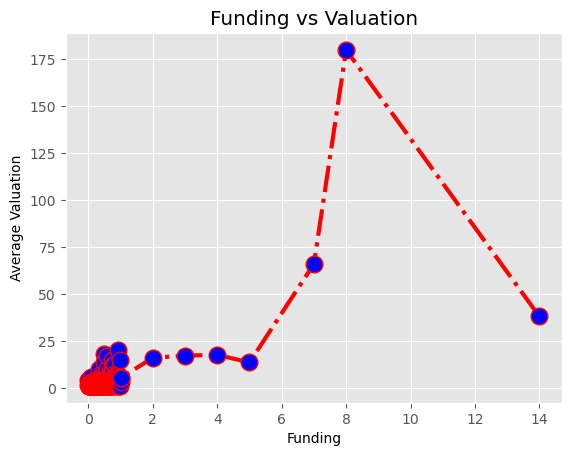

In [80]:
# visualize FUNDING VS. VALUATION

# Group the data by 'Funding' and calculate the average valuation for each funding level
avg_valuation_by_funding = df.groupby('Funding')['Valuation ($B)'].mean().reset_index()

# Sort the data based on funding for a smoother line plot
avg_valuation_by_funding = avg_valuation_by_funding.sort_values('Funding')

# Plot the line chart
plt.plot(avg_valuation_by_funding['Funding'], avg_valuation_by_funding['Valuation ($B)'], 
         marker='o', markerfacecolor = 'blue',markersize = 12, linestyle='dashdot', color = 'red', linewidth=3)
plt.xlabel('Funding')
plt.ylabel('Average Valuation')
plt.title('Funding vs Valuation')
plt.grid(True)
plt.show()

#### Observation:
* There is a positive correlation between funding and valuation.

* In the case of JUUL Labs which got the most funding(14B) but drops in valuation; research shows there was an ongoing dispute between JUULS Labs and the USA FDA, leading to a fall in their market share and ultimately stopping the sales of JUUL pods.

### General Observations:
* There are over 1000+ unicorn companies, located in 46 countries and 256 cities across the world.

* These companies are grouped into 16 different industries.

* The most valuable unicorn is valued at 180 Billion Dollars ; a company needs to be valued at $1B to be considered a unicorn

* It is possible to achieve unicorn status within 2 - 4 years of founding. On average, it takes 7 years to become a unicorn.

* Fintech is the most valued industry, followed by Internet Software Service, E-Commerce & direct-to-consumer, Artificial Intelligence, and Health.

* United States houses 64.7% of unicorns. San Francisco and New York are the cities with the most unicorns in the world.

* The amount of funding from investors positively influences the development of a unicorn.

### Recommendations
* A good business model, strategy, and vision designed for rapid growth is necessary for becoming a unicorn. 

* There should be a good relationship with the right investors in your industry. There are investor hubs like 'Kickstarter' to be a part of to build these networks.

* The top industries show where the interest of the people lie. Therefore, there will be more investors willing to fund startups in those areas. 

* It is advisable to discover a large homogenous potential market in order to drive more engagement. Define your audience and market strategically. 

* More startups needs to feed into the tech space and doscover how to solve consumer problems with the use of technology. This is a fast-growing industry. Try to be unique and bring something different into the tech space.